In [151]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [138]:
data = pd.read_table("nutpro_comments.txt",encoding='gbk',names=['time','nickname','type','content'])
data.head()

,time,nickname,type,content
0,2017-05-11 17:25:33,5***p,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮得不像实力派#好些年前，门户网站新闻首页看到了罗永浩在西门子楼前砸冰箱的事件，开始认识...
1,2017-05-13 02:02:24,1***1,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,&quot;漂亮得不像实力派&quot;坚果Pro才是&quot;漂亮得不像实力派&quot...
2,2017-05-10 15:37:26,r***u,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,一直支持老罗，支持追求自己梦想、认真做事的人。这已经是买的第四个锤子了，给父母买了T1和T2...
3,2017-05-10 20:29:39,jd_便，开始909,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮的不像实力派#一路上拿到快递都心情激动，这么多年我终于也情怀充值了一把！希望罗老师能看...
4,2017-06-08 21:11:06,j***f,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,用了一个星期才来晒单，第一次支持锤子，首先是看到外观被吸引的，外观亮瞎眼。然后就回看发布会，...


In [139]:
data.shape

(15080, 4)

In [140]:
data.type.value_counts()

锤子 坚果Pro 64GB 巧克力色 全网通 移动联通电信4G手机 双卡双待        2970
锤子 坚果Pro 128GB 酒红色 全网通 移动联通电信4G手机 双卡双待        2889
锤子 坚果Pro 128GB 碳黑色 全网通 移动联通电信4G手机 双卡双待        2026
锤子 坚果Pro 64GB 细红线特别版 全网通 移动联通电信4G手机 双卡双待      1386
锤子 坚果Pro 128GB 浅金色 全网通 移动联通电信4G手机 双卡双待        1363
锤子 坚果Pro 64GB 浅金色 全网通 移动联通电信4G手机 双卡双待         1306
锤子 坚果Pro 128GB 细红线特别版 全网通 移动联通电信4G手机 双卡双待      990
锤子 坚果Pro 64GB 酒红色 全网通 移动联通电信4G手机 双卡双待          990
锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待          979
锤子 坚果Pro 128GB 巧克力色 全网通 移动联通电信4G手机 双卡双待        181
Name: type, dtype: int64

In [141]:
cols = list(data.columns)
missing = list(map(lambda x:data[x].isnull().sum(),cols))
missing_dict = dict(zip(cols,missing))
missing_dict

{'content': 0, 'nickname': 0, 'time': 0, 'type': 0}

In [142]:
type_split = pd.DataFrame(data.type.str.split().tolist(),columns =['brand1','brand2','storage','color','net','operator','sim'])
type_split.head(10)

,brand1,brand2,storage,color,net,operator,sim
0,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
1,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
2,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
3,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
4,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
5,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
6,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
7,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
8,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
9,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待


In [143]:
df = pd.concat([data,type_split],axis=1)
df

,time,nickname,type,content,brand1,brand2,storage,color,net,operator,sim
0,2017-05-11 17:25:33,5***p,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮得不像实力派#好些年前，门户网站新闻首页看到了罗永浩在西门子楼前砸冰箱的事件，开始认识...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
1,2017-05-13 02:02:24,1***1,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,&quot;漂亮得不像实力派&quot;坚果Pro才是&quot;漂亮得不像实力派&quot...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
2,2017-05-10 15:37:26,r***u,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,一直支持老罗，支持追求自己梦想、认真做事的人。这已经是买的第四个锤子了，给父母买了T1和T2...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
3,2017-05-10 20:29:39,jd_便，开始909,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮的不像实力派#一路上拿到快递都心情激动，这么多年我终于也情怀充值了一把！希望罗老师能看...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
4,2017-06-08 21:11:06,j***f,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,用了一个星期才来晒单，第一次支持锤子，首先是看到外观被吸引的，外观亮瞎眼。然后就回看发布会，...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
5,2017-06-20 13:08:11,沐***洺,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,坚果一代自发布以来使用至今，硬件虽不够强悍，但不得不说 smartisan OS 真心好用，...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
6,2017-05-11 15:02:39,j***8,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮的不像实力派#锤子、罗永浩、坚果，从来就不用担心没有话题可谈，说真的，这么久了，没有像...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
7,2017-05-21 09:50:22,n***6,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮的不像实力派#说说我对锤子的印象吧，我对老罗没有什么感觉，我朋友中间有锤粉，特别欣赏老...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
8,2017-05-18 22:26:22,q***9,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,#漂亮的不像实力派#T1一直用到现在，电池是真的不行了，用的话两三个小时，上次发布会就想换了...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待
9,2017-06-01 13:02:33,_RONGC,锤子 坚果Pro 64GB 碳黑色 全网通 移动联通电信4G手机 双卡双待,不少人对坚果Pro的印象仍旧停留在外观上，但圆滑也好，锐利也罢，外观设计上的流行都只是一时的...,锤子,坚果Pro,64GB,碳黑色,全网通,移动联通电信4G手机,双卡双待


In [144]:
df.color.value_counts()

酒红色       3879
巧克力色      3151
碳黑色       3005
浅金色       2669
细红线特别版    2376
Name: color, dtype: int64

In [145]:
df.storage.value_counts()

64GB     7631
128GB    7449
Name: storage, dtype: int64

In [149]:
color_size = pd.pivot_table(df,index = ['storage'],values=["nickname"],
                           columns = ['color'],aggfunc=len,
                           fill_value=0,margins=True)
color_size

nickname                                         
color       巧克力色     浅金色     碳黑色  细红线特别版     酒红色      All
storage                                                  
128GB      181.0  1363.0  2026.0   990.0  2889.0   7449.0
64GB      2970.0  1306.0   979.0  1386.0   990.0   7631.0
All       3151.0  2669.0  3005.0  2376.0  3879.0  15080.0

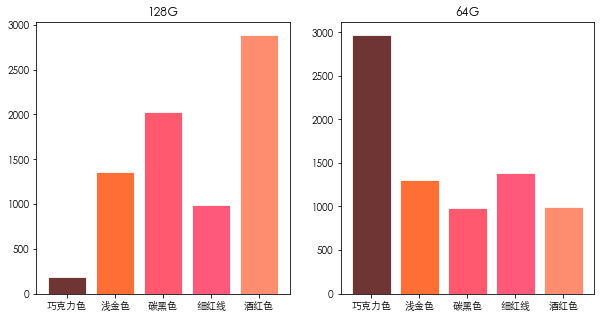

In [167]:
color_size = pd.pivot_table(df,index = ['storage'],values=['nickname'],
                           columns = ['color'],aggfunc = len,
                           fill_value = 0)
ta = color_size.loc[u'128GB']
tb = color_size.loc[u'64GB']
k = np.array([1,2,3,4,5])
plt.rc('font',family = 'STXihei',size=10)
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
plt.bar([1,2,3,4,5],ta,color=['#4b0101','#fe4b03','#fe2f4a','#fe2f5a','#fe6f4a'],alpha = 0.8,align = 'center',edgecolor='white')
plt.title('128G')
plt.xticks(k,(u'巧克力色',u'浅金色',u'碳黑色',u'细红线',u'酒红色'))

plt.subplot(1,2,2)
plt.bar([1,2,3,4,5],tb,color=['#4b0101','#fe4b03','#fe2f4a','#fe2f5a','#fe6f4a'],alpha = 0.8,align = 'center',edgecolor='white')
plt.title('64G')
plt.xticks(k,(u'巧克力色',u'浅金色',u'碳黑色',u'细红线',u'酒红色'))
plt.show()